<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:130%; text-align:left">

<h2 align="left"><font color=#3b2b6b>Introduction:</font></h2>
    Our task will be to assign irises from a data set according to 4 traits to one of three classes. Let's take a look at them 👇

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2021/10/iris-flower.webp)

    
<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:130%; text-align:left">

<h2 align="left"><font color=#3b2b6b>Distribution classes:</font></h2>
    
Pretty pretty, but I also suggest looking at the distribution of classes in our dataset. It is important that the data be separable, not necessarily linearly partitioned. The main requirement is that what you want to classify should be at least somehow separable in the indicative space. It's trite, but the work is designed for beginners. Let's take a look at the distribution 👇


![](https://www.researchgate.net/publication/321930265/figure/fig4/AS:960500506578945@1606012574194/Clustering-of-iris-dataset-using-ICSO-algorithm-3D-View.gif)

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:130%; text-align:left">

<h2 align="left"><font color=#3b2b6b>Data as table:</font></h2>

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. In general, we will refer to the rows of the matrix as samples, and the number of rows as n_samples and the the columns of the matrix as features, and the number of columns as n_features.

<h2 align="left"><font color=#3b2b6b>Features matrix:</font></h2>
    
This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, called the features matrix with shape [n_samples, n_features]

<h2 align="left"><font color=#3b2b6b>Target array:</font></h2>
    
In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series.

<a id="contents_tabel"></a>
<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
<h2 align="left"><font color=#3b2b6b>Table of Contents:</font></h2>
    
**Data Preprocessing:**

* Importing Necessary Libraries
* Loading DataSet
* Initial Data Analysis
* Checking if there are any missing values

**Exploratory Data Analysis(EDA):**
* Boxplot
* Scatterplot
* Jointplot
* Pairplot
* Andrews_curves

**Correlation**

**Feature Selection**

**Label Encoding**

**Splitting The Data into Training And Testing Dataset**

**Building Machine learning Models**
* Random Forest Classifier
* Logistic Regression
* KNN
* Naive Bayes
* Decision Tree

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Importing Necessary Libraries</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Loading the Dataset</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
Next, I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [2]:
df = pd.read_csv("/kaggle/input/irisraw/irisraw.csv")

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:130%; text-align:left">

<h2 align="left"><font color=#3b2b6b>Dataset Description:</font></h2>

**Variable**   | **Description**
     
**Sepal length** | Length of the outermost part of the flower.
    
**Sepal Width**  | Width of the outermost part of the flower.
    
**Petal Length** | Length of the colorful part of the flower.
    
**Petal Width**  | Width of the colorful part of the flower.
    
**Species** | The specific type or category of the flower.
</div>

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Initial Data Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">

First I will perform a preliminary analysis to understand the structure and types of data columns:

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">

**Machine Learning Terminology**

Each row is an observation (also known as : sample, example, instance, record)

Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
#describing about the dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#count the value
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Checking if there are any missing values
</span></b>

![](https://mlxb3uasbvvi.i.optimole.com/w:500/h:374/q:mauto/f:avif/https://www.izen.ai/wp-content/uploads/2019/09/1_Yko3Fem6Tzi74OkYm9Imqg.jpeg)

In [8]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Exploratory Data Analysis(EDA)</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">

**EDA (Exploratory Data Analysis)** in simple words is like being a detective for data. It's the process of examining and understanding a dataset before you start building models or making decisions based on the data.

**EDA** is like exploring a new place, looking for clues, and making sense of what you find before making any important decisions. It's a crucial step in the data analysis process.

<a id="libraries"></a>
# <b><span style='color:#9900cc'> 1. Relationship between species and sepal length</span></b>

<Axes: xlabel='species', ylabel='sepal length'>

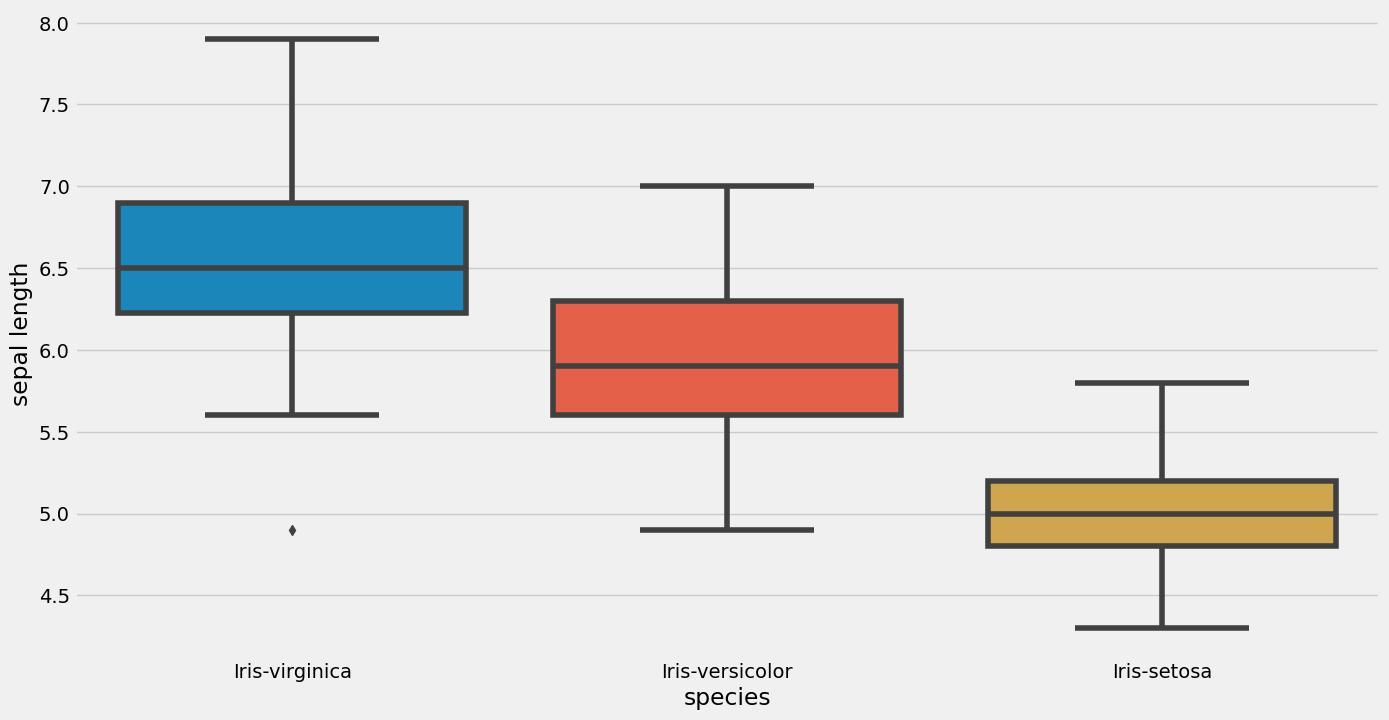

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal length',data=df.sort_values('sepal length',ascending=False))

<a id="libraries"></a>
# <b><span style='color:#9900cc'> 2. Relationship between species and sepal width</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
A scatter plot is a type of data visualization used to display the relationship between two numeric variables. Each data point in the plot represents a single observation in your dataset, and the position of the point is determined by the values of the two variables being compared. Scatter plots are particularly useful for identifying patterns, trends, and potential outliers in the data.

<Axes: xlabel='sepal width', ylabel='sepal length'>

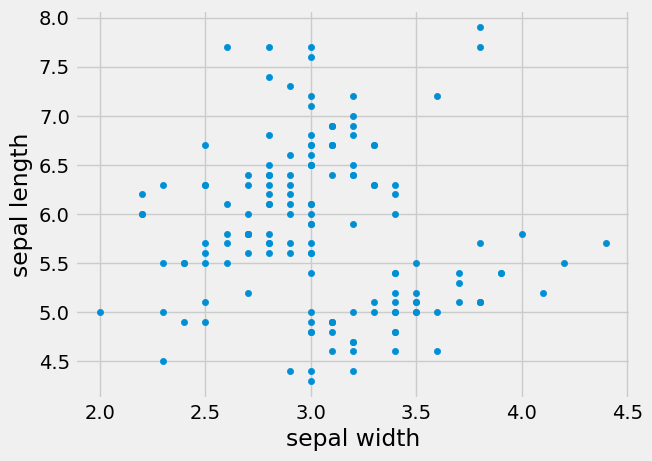

In [10]:
df.plot(kind='scatter',x='sepal width',y='sepal length')

<a id="libraries"></a>
# <b><span style='color:#9900cc'> 3. Relationship between sepal width and sepal length</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">

A jointplot is a type of data visualization in Python, commonly used with the Seaborn library, to explore the relationship between two numeric variables. It combines several plots into one, making it easy to see how the variables are distributed and correlated.

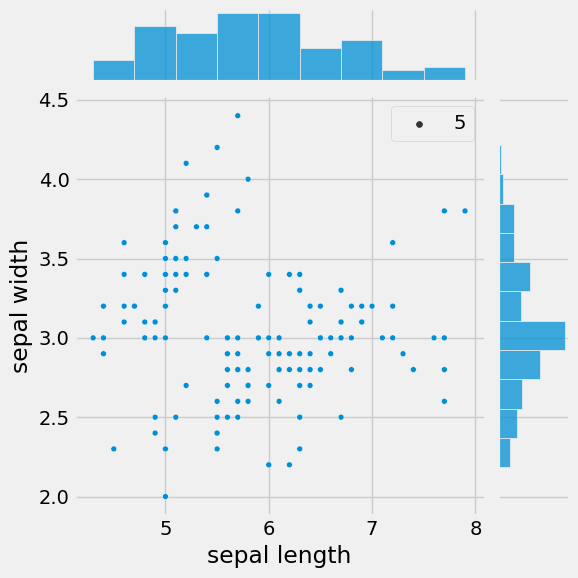

In [11]:
sns.jointplot(x="sepal length", y="sepal width", data=df, size=5) 

<a id="libraries"></a>
# <b><span style='color:#9900cc'> 4.Pairplot</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
A pairplot is a graphical representation commonly used in data analysis to visualize the relationships between multiple pairs of variables in a dataset. It's a part of the Seaborn library in Python. A pairplot displays scatterplots for each combination of numerical variables and histograms for the individual variables along the diagonal.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


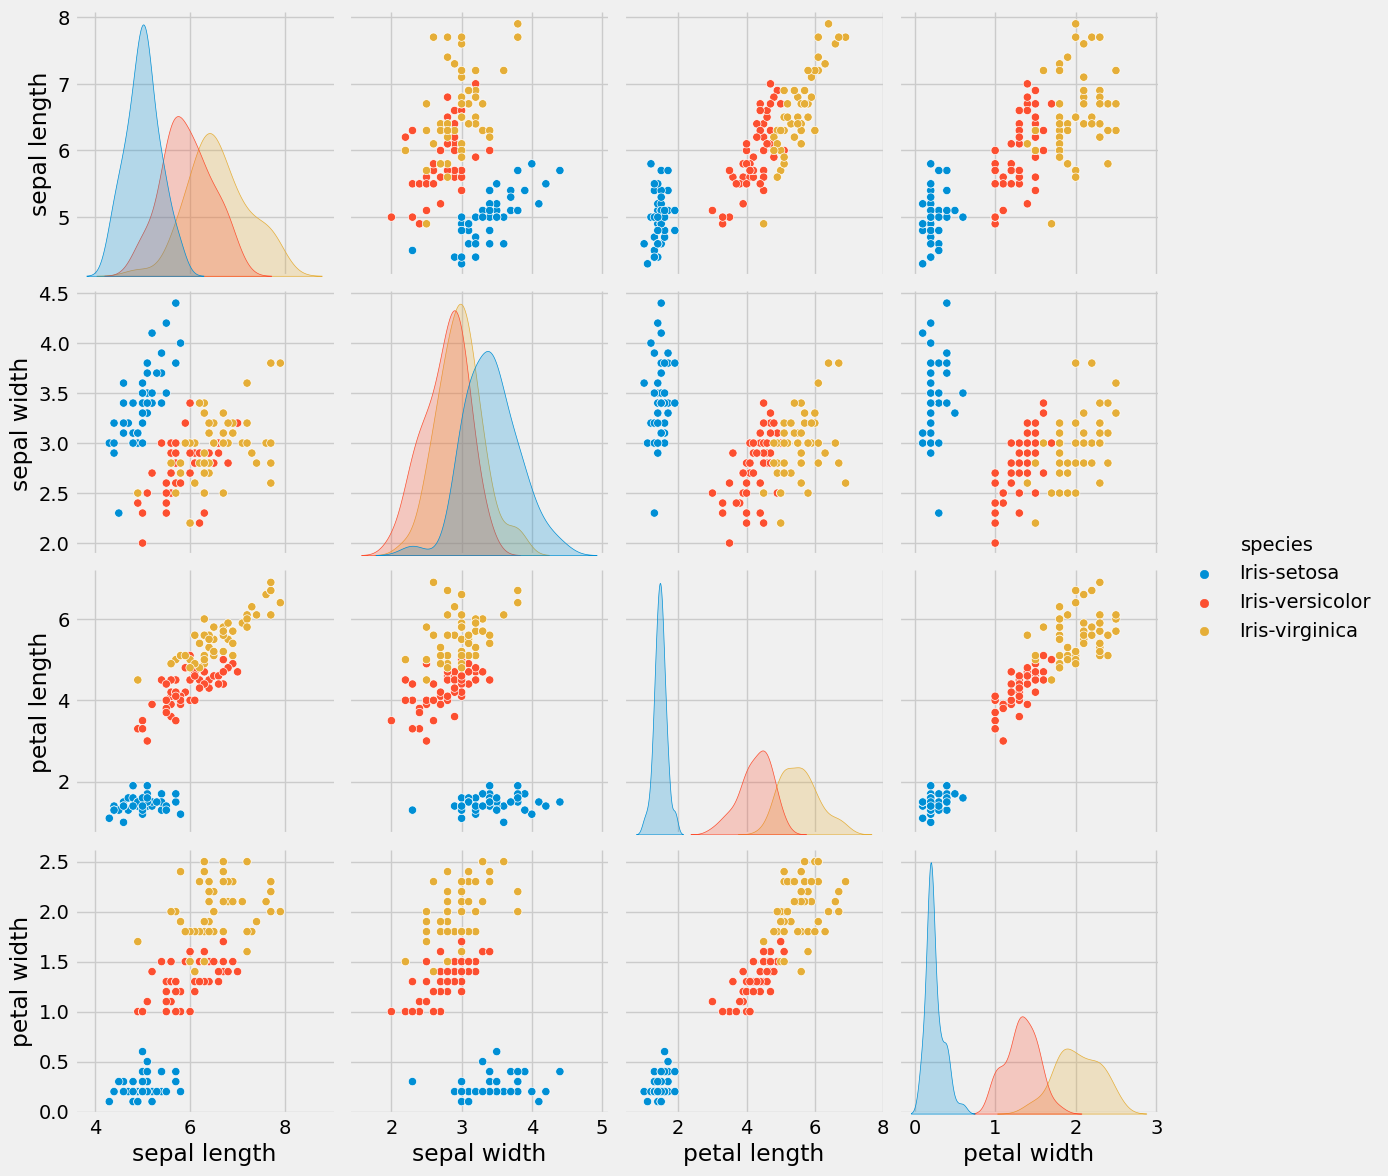

In [12]:
sns.pairplot(df, hue="species", size=3)

<a id="libraries"></a>
# <b><span style='color:#9900cc'> 5.Boxplot</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
A boxplot, also known as a box-and-whisker plot, is a graphical representation of the distribution and spread of a dataset. It provides a visual summary of key statistics such as the median, quartiles, and potential outliers.

array([[<Axes: title={'center': 'petal length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal width'}, xlabel='[species]'>]],
      dtype=object)

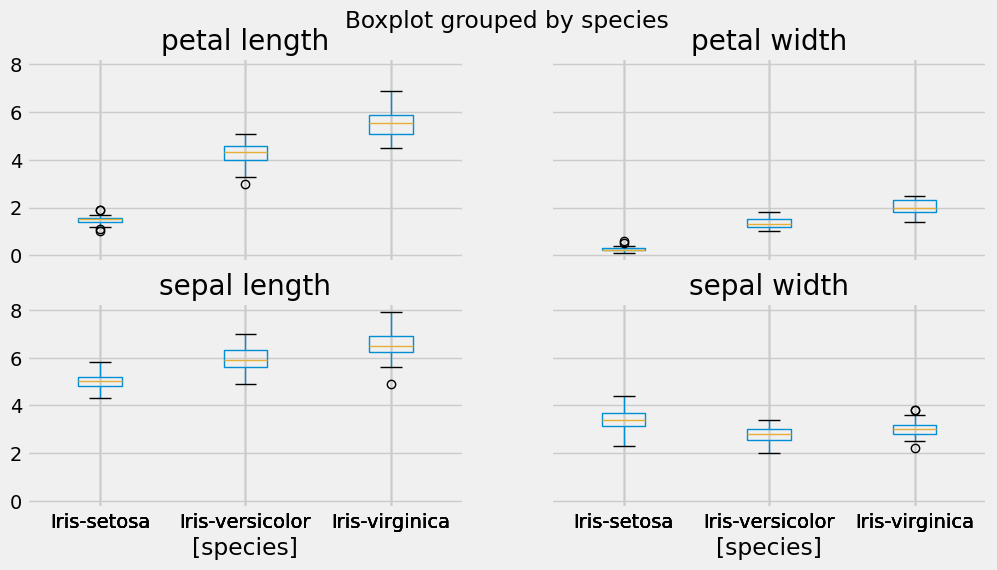

In [13]:
df.boxplot(by="species", figsize=(12, 6))

<a id="libraries"></a>
# <b><span style='color:#9900cc'> 6. Andrews_curves</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">

Andrews Curves is a data visualization technique used to visualize high-dimensional data by mapping each data point into a curve in a 2D space. This technique is particularly useful for exploring and understanding the overall structure and patterns in multivariate datasets.

Andrews Curves are most commonly used in data exploration and dimensionality reduction tasks, where you want to get a quick overview of how variables are related and whether there are any interesting patterns or groupings in the data.

<Axes: >

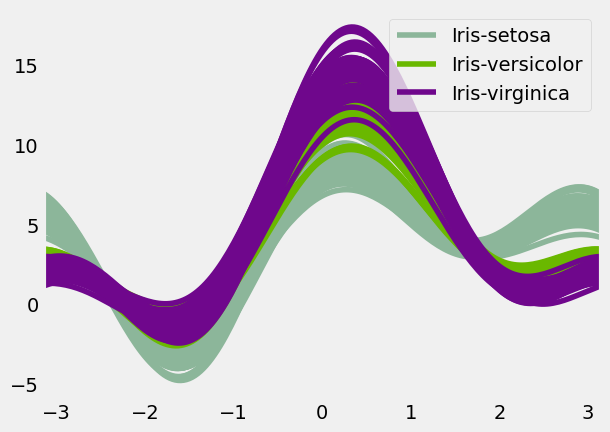

In [14]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "species")

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Correlation</span></b>

![](https://www.mathsisfun.com/data/images/correlation-examples.svg)

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [15]:
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


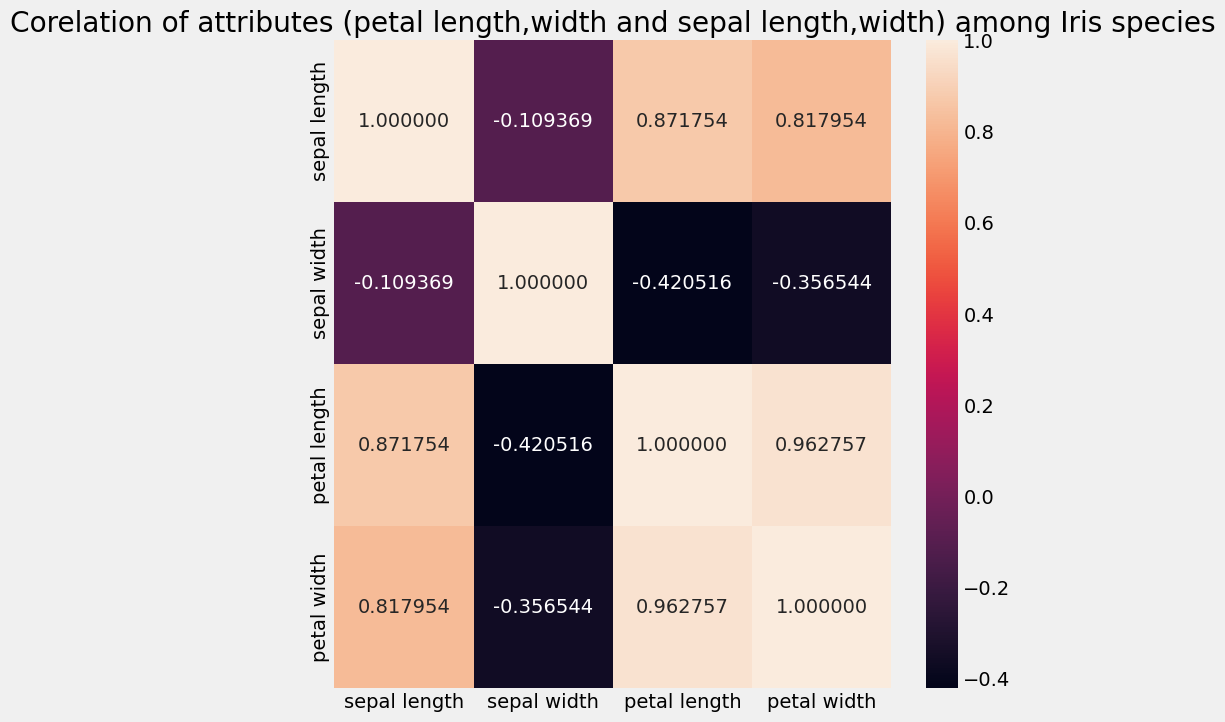

In [16]:
plt.subplots(figsize = (8,8))
sns.heatmap(correlation_matrix, annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
**Observation**

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Feature Selection</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
**Dividing data into features and labels**
    
As we can see dataset contain 5 columns: sepal length, sepal width, petal length, petal width and species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-02-at-5.58.44-PM.png)

In [17]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Label encoding</span></b>

![](https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png)

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Splitting The Data into Training And Testing Dataset</span></b>

In [19]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Building Machine Learning Models</span></b>

<a id="libraries"></a>
# <b><span style='color:#9900cc'> 1.Random Forest</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

![](https://av-eks-blogoptimized.s3.amazonaws.com/33019random-forest-algorithm287548.png)

In [20]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_random_Forest : 0.978
precision_random_Forest : 0.978
recall_random_Forest : 0.978
f1-score_random_Forest : 0.978


<a id="libraries"></a>
# <b><span style='color:#9900cc'> 2.Logistic Regression</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.

![](https://miro.medium.com/v2/resize:fit:966/1*KoAzQLM1zDi5s9yTR9V6hw.png)

In [21]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_Logistic Regression : 0.978
precision_Logistic Regression : 0.978
recall_Logistic Regression: 0.978
f1-score_Logistic Regression : 0.978


<a id="libraries"></a>
# <b><span style='color:#9900cc'> 3. K Nearest Neighbor</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

![](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978



<a id="libraries"></a>
# <b><span style='color:#9900cc'> 4. Gaussian Naive Bayes</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

![](https://miro.medium.com/v2/resize:fit:1200/0*qFuHAV7Vd09064q-.jpeg)

In [23]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000



<a id="libraries"></a>
# <b><span style='color:#9900cc'> 5. Decision Tree</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

![](https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png)

In [24]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


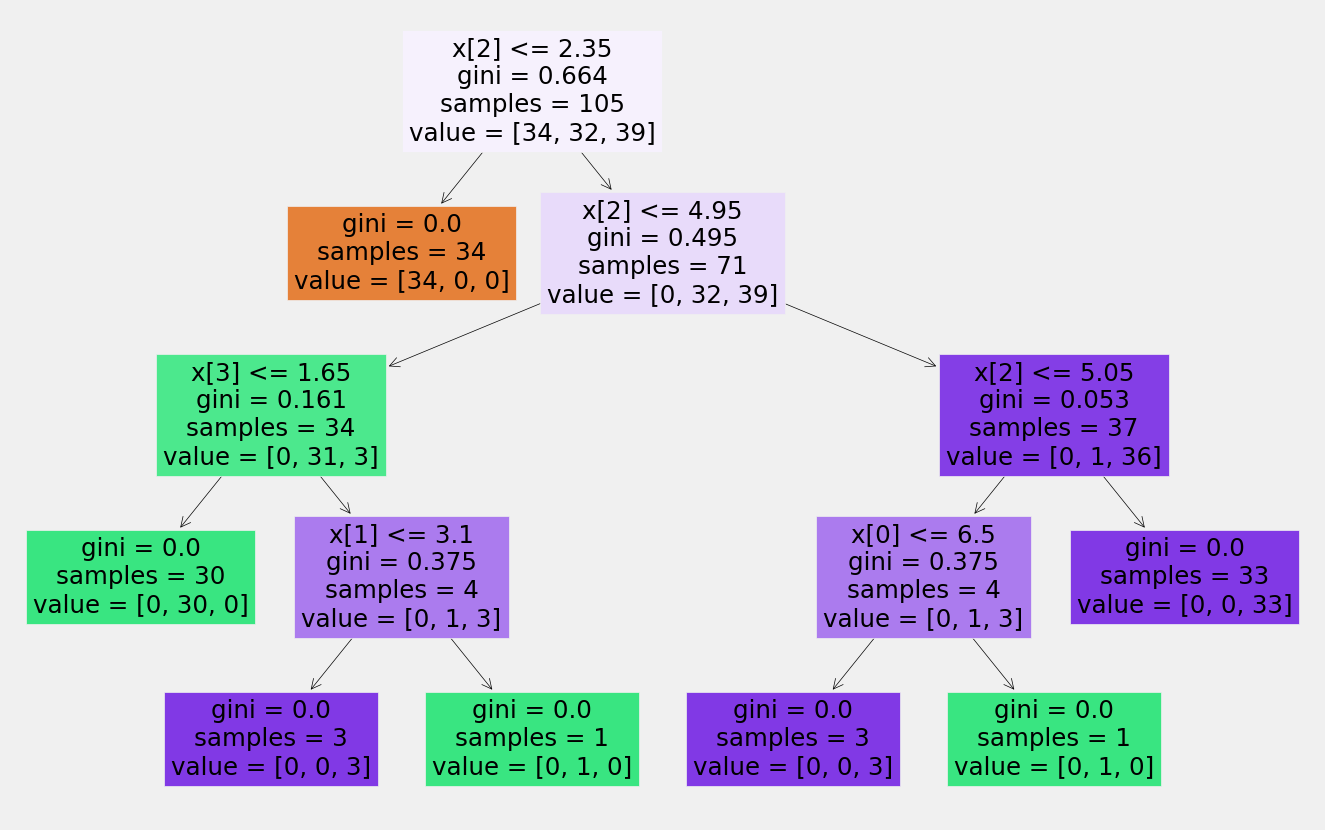

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

<a id="libraries"></a>
# <b><span style='color:#9900cc'> Which is the best Model ?</span></b>

In [26]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_log, 
              acc_random_forest,
              acc_gaussian,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Naive Bayes,94.29,100.00
1,KNN,96.19,97.78
2,Logistic Regression,98.10,97.78
3,Random Forest,100.00,97.78
4,Decision Tree,100.00,97.78


<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
As we see best Model is given by Naive Bayes(100% Accuracy).

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
**Observations:**
    
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features.

<div style="border-radius:10px; padding: 15px; background-color: #b3ffcc; font-size:120%; text-align:left">
    
If you've made it this far, I hope you found my analysis enjoyable and informative.

If you found it helpful, please consider upvoting!

As a beginner, I welcome any suggestions and feedback in the comments section. Your input is highly valuable.

If you have any questions or uncertainties about any part of the notebook, please don't hesitate to leave a comment with your inquiries.

**Thank you for your time and attention!**